In [ ]:
'''
Código criado por Júlia Nogueira em 06/09/2021
Atualizado pela última vez em 07/09/2021

Objetivo: Aplicação de Random Forests a um problema de classificação:
Detecção e diagnóstico de falhas em uma unidade de águas ácidas.

Utiliza os dados do trabalho: 
"FAULT DETECTION AND DIAGNOSIS OF A TWO-COLUMN SOUR WATER TREATMENT UNIT BASED ON ARTIFICIAL INTELLIGENCE
ALGORITHMS"

'''

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
# import joblib

import sklearn.model_selection
import sklearn.metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score

# import sys
# import time

In [ ]:
'''# Começa a contar o tempo de processamento
t = time.time()

# Salva a saída do terminal em um arquivo
f = open("RF_output", 'w')
sys.stdout = f'''

In [16]:
# Leitura e conversão dos dados em array
dados_train = np.genfromtxt('SWTU_FDD_standardized_train_data.txt', skip_header=1)
print("Formato dos dados de treinamento:", dados_train.shape)

dados_test = np.genfromtxt('SWTU_FDD_standardized_test_data.txt', skip_header=1)
print("Formato dos dados de teste:", dados_test.shape)

# header
with open('SWTU_FDD_standardized_train_data.txt', 'r') as file:
    header = file.readline().strip() # pegando a primeira linha
header = header.split()
print('Header:', header)

Formato dos dados de treinamento: (37519, 27)
Formato dos dados de teste: (22525, 27)
Header: ['ACG1P(t-1)', 'AMG1P(t-1)', 'C1SL(t-1)', 'C2DL(t-1)', 'C2SL(t-1)', 'SW8T(t-1)', 'C1S2T(t-1)', 'AMG1T(t-1)', 'SW1F(t-1)', 'SW5F(t-1)', 'CW5F(t-1)', 'CW8F(t-1)', 'C2HDI(t-1)', 'ACG1P(t)', 'AMG1P(t)', 'C1SL(t)', 'C2DL(t)', 'C2SL(t)', 'SW8T(t)', 'C1S2T(t)', 'AMG1T(t)', 'SW1F(t)', 'SW5F(t)', 'CW5F(t)', 'CW8F(t)', 'C2HDI(t)', 'CLASS']


In [17]:
# Separação das entradas e saídas dos modelos
train_data, train_output = dados_train[:, :-1], dados_train[:, -1]
test_data, test_output = dados_test[:, :-1], dados_test[:, -1]

print("Formato dos dados de entrada de treinamento:", train_data.shape)
print("Formato dos dados de entrada de teste:", test_data.shape)
print("Formato dos dados de saída de treinamento:", train_output.shape)
print("Formato dos dados de saída teste:", test_output.shape)

Formato dos dados de entrada de treinamento: (37519, 26)
Formato dos dados de entrada de teste: (22525, 26)
Formato dos dados de saída de treinamento: (37519,)
Formato dos dados de saída teste: (22525,)


In [18]:
# Otimização de Hiperparâmetros
def objetivo_rc(trial):
    # Hiperparâmetros de busca para RF
    rf_min_samples_leaf = trial.suggest_int("rf_min_samples_leaf", 1, 10)
    rf_max_depth = trial.suggest_int("rf_max_depth", 5, 30, log = True)
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 1, 100)

    # Criação do modelo RF
    m = sklearn.ensemble.RandomForestClassifier(max_depth = rf_max_depth, 
    min_samples_leaf = rf_min_samples_leaf, n_estimators = rf_n_estimators)

    # Retornando acurácia
    acuracias = sklearn.model_selection.cross_val_score(m, train_data, train_output)
    acuracia = acuracias.mean()

    return acuracia

# Resultados função objetivo
study_rc = optuna.create_study(direction="maximize")
n_trials = 40
print("Nº Iterações Otimização:", n_trials)
study_rc.optimize(objetivo_rc, n_trials=n_trials)
print("Hiperparâmetros Otimizados:", study_rc.best_params)

[I 2021-09-06 11:41:04,059] A new study created in memory with name: no-name-5a7f7202-90be-419c-84bd-70f9cdde2e42


Nº Iterações Otimização: 40


[I 2021-09-06 11:42:29,623] Trial 0 finished with value: 0.9355526694794719 and parameters: {'rf_min_samples_leaf': 3, 'rf_max_depth': 8, 'rf_n_estimators': 98}. Best is trial 0 with value: 0.9355526694794719.
[I 2021-09-06 11:43:09,245] Trial 1 finished with value: 0.939923756865413 and parameters: {'rf_min_samples_leaf': 8, 'rf_max_depth': 9, 'rf_n_estimators': 49}. Best is trial 1 with value: 0.939923756865413.
[I 2021-09-06 11:44:45,403] Trial 2 finished with value: 0.9525041369379753 and parameters: {'rf_min_samples_leaf': 8, 'rf_max_depth': 14, 'rf_n_estimators': 86}. Best is trial 2 with value: 0.9525041369379753.
[I 2021-09-06 11:44:54,069] Trial 3 finished with value: 0.9543165463025876 and parameters: {'rf_min_samples_leaf': 10, 'rf_max_depth': 25, 'rf_n_estimators': 5}. Best is trial 3 with value: 0.9543165463025876.
[I 2021-09-06 11:46:52,185] Trial 4 finished with value: 0.9602602100595441 and parameters: {'rf_min_samples_leaf': 1, 'rf_max_depth': 22, 'rf_n_estimators': 66

Hiperparâmetros Otimizados: {'rf_min_samples_leaf': 2, 'rf_max_depth': 25, 'rf_n_estimators': 99}


In [19]:
# Gráficos otimização de hiperparâmetros
fig1 = optuna.visualization.plot_optimization_history(study_rc)
fig1.show()

fig2 = optuna.visualization.plot_slice(study_rc)
fig2.show()

fig3 = optuna.visualization.plot_parallel_coordinate(study_rc)
fig3.show() 

In [20]:
# Criação, treinamento e teste do modelo RF com hiperparâmetros otimizados
m2 = sklearn.ensemble.RandomForestClassifier(max_depth = study_rc.best_params['rf_max_depth'],
min_samples_leaf = study_rc.best_params['rf_min_samples_leaf'],
n_estimators = study_rc.best_params['rf_n_estimators'])

m2.fit(train_data, train_output)  # treinamento
predictions = m2.predict(test_data)  # teste

In [ ]:
'''# Célula alternativa a anterior, que salva o modelo em um arquivo joblib

# Criação, treinamento e teste do modelo RF com hiperparâmetros otimizados
m2 = sklearn.ensemble.RandomForestClassifier(max_depth = study_rc.best_params['rf_max_depth'],
min_samples_leaf = study_rc.best_params['rf_min_samples_leaf'],
n_estimators = study_rc.best_params['rf_n_estimators'])

m2.fit(train_data, train_output)  # treinamento

joblib.dump(m2, "RF_model.joblib")
loaded_model = joblib.load("RF_model.joblib")
predictions = loaded_model.predict(test_data)  # teste '''

Relatório de classificação:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     14657
         1.0       0.94      0.85      0.89      2742
         2.0       0.99      0.72      0.84      2659
         3.0       0.97      0.90      0.93       663
         4.0       0.98      1.00      0.99       470
         5.0       1.00      0.99      0.99       719
         6.0       1.00      0.90      0.95       615

    accuracy                           0.93     22525
   macro avg       0.97      0.91      0.93     22525
weighted avg       0.94      0.93      0.93     22525

Matriz de confusão:
 [[14452   157    14    20    11     1     2]
 [  417  2325     0     0     0     0     0]
 [  735     0  1924     0     0     0     0]
 [   64     0     0   599     0     0     0]
 [    0     0     0     0   470     0     0]
 [    9     0     0     0     0   710     0]
 [   59     0     0     0     0     0   556]]


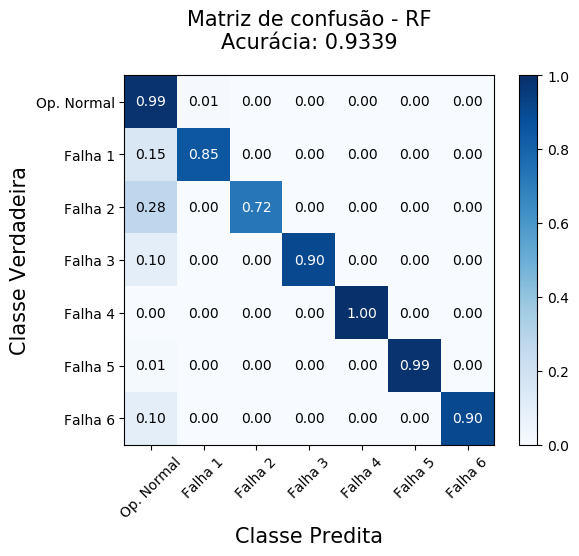

In [21]:
# Matriz de confusão e relatório de classificação
class_report = classification_report(test_output, predictions)
print('Relatório de classificação:\n', class_report)
conf_mat = confusion_matrix(
    test_output, predictions, labels=[0, 1, 2, 3, 4, 5, 6])
print('Matriz de confusão:\n', conf_mat)

# Gráfico matriz de confusão
plt.rcParams.update(plt.rcParamsDefault)
LABELS = ["Op. Normal", "Falha 1", "Falha 2",
          "Falha 3", "Falha 4", "Falha 5", "Falha 6"]
acc = accuracy_score(test_output, predictions)
plot_confusion_matrix(conf_mat=conf_mat, colorbar=True, show_absolute=False,
show_normed=True, class_names=LABELS, cmap=plt.cm.Blues)

plt.title("Matriz de confusão - RF\nAcurácia: %1.4f" % acc, fontsize=15)
plt.ylabel('Classe Verdadeira', fontsize=15)
plt.xlabel('Classe Predita', fontsize=15)
plt.savefig('RF_confmat.png')
plt.show()
plt.close()

Variável: ACG1P(t)             Importância: 0.1244
Variável: ACG1P(t-1)           Importância: 0.1216
Variável: SW5F(t)              Importância: 0.0957
Variável: SW5F(t-1)            Importância: 0.0811
Variável: C2SL(t)              Importância: 0.0786
Variável: SW1F(t)              Importância: 0.0721
Variável: SW1F(t-1)            Importância: 0.0704
Variável: C2SL(t-1)            Importância: 0.0692
Variável: SW8T(t-1)            Importância: 0.0617
Variável: SW8T(t)              Importância: 0.055
Variável: AMG1P(t-1)           Importância: 0.0276
Variável: AMG1P(t)             Importância: 0.0236
Variável: AMG1T(t-1)           Importância: 0.0137
Variável: AMG1T(t)             Importância: 0.0137
Variável: C2DL(t-1)            Importância: 0.0133
Variável: C1S2T(t)             Importância: 0.0124
Variável: C1S2T(t-1)           Importância: 0.0119
Variável: C2DL(t)              Importância: 0.0117
Variável: C2HDI(t)             Importância: 0.0091
Variável: C2HDI(t-1)           I

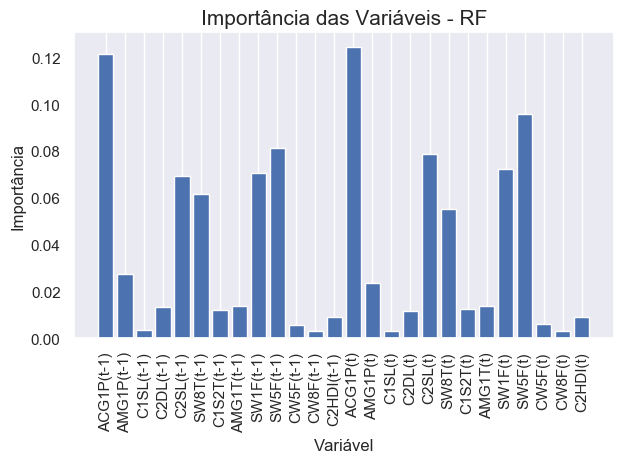

In [22]:
# Importancia das variáveis
importances = list(m2.feature_importances_)
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(header, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
[print('Variável: {:20} Importância: {}'.format(*pair)) for pair in feature_importances]

# Gráfico importância
sns.set(font_scale=1)
x_values = list(range(len(importances)))
plt.figure()
plt.grid(axis='y')
plt.bar(x_values, importances, orientation='vertical')
plt.xticks(x_values, header, rotation='vertical')
plt.ylabel('Importância')
plt.xlabel('Variável')
plt.title('Importância das Variáveis - RF', fontsize=15)
plt.tight_layout()
plt.savefig('RF_importance.png')
plt.show()
plt.close()

In [23]:
# ----------------- Redução variáveis pela importância -----------------
print("------------------ REDUÇÃO DE VARIÁVEIS -------------------\n")
# Quantidade de variáveis que serão utilizadas na redução
columns = sum(big > 0.02 for big in importances)
# Criando vetor reduzido dados treino
train_data_red = np.zeros((train_data.shape[0], columns))
# Criando vetor reduzido dados teste
test_data_red = np.zeros((test_data.shape[0], columns))
# Criando vetor reduzido header
header_red = []
fix_pos = 0  # Contador dos dados reduzidos
total_importance = 0  # Soma da importância total das variáveis reduzidas
for pos, item in enumerate(importances):
    if item > 0.02:  # Critério para redução
        train_data_red[:, fix_pos] = train_data[:, pos]
        test_data_red[:, fix_pos] = test_data[:, pos]
        header_red.append(header[pos])
        fix_pos = fix_pos + 1
        total_importance = total_importance + item

print("Importância total da versão reduzida:", total_importance)
print("Formato dos dados de entrada de treinamento reduzidos:", train_data_red.shape)
print("Formato dos dados de de entrada de teste reduzidos:", test_data_red.shape)
print("Formato do header reduzido:", len(header_red))
print("Header reduzido:", header_red)

------------------ REDUÇÃO DE VARIÁVEIS -------------------

Importância total da versão reduzida: 0.8809317549981355
Formato dos dados de entrada de treinamento reduzidos: (37519, 12)
Formato dos dados de de entrada de teste reduzidos: (22525, 12)
Formato do header reduzido: 12
Header reduzido: ['ACG1P(t-1)', 'AMG1P(t-1)', 'C1SL(t-1)', 'C2DL(t-1)', 'C2SL(t-1)', 'SW8T(t-1)', 'C1S2T(t-1)', 'AMG1T(t-1)', 'SW1F(t-1)', 'SW5F(t-1)', 'CW5F(t-1)', 'CW8F(t-1)', 'C2HDI(t-1)', 'ACG1P(t)', 'AMG1P(t)', 'C1SL(t)', 'C2DL(t)', 'C2SL(t)', 'SW8T(t)', 'C1S2T(t)', 'AMG1T(t)', 'SW1F(t)', 'SW5F(t)', 'CW5F(t)', 'CW8F(t)', 'C2HDI(t)', 'CLASS']


In [24]:
# Criação, treinamento e teste do modelo RF com hiperparâmetros otimizados
m3 = sklearn.ensemble.RandomForestClassifier(max_depth = study_rc.best_params['rf_max_depth'],
min_samples_leaf = study_rc.best_params['rf_min_samples_leaf'],
n_estimators = study_rc.best_params['rf_n_estimators'])

m3.fit(train_data_red, train_output)  # treinamento
predictions2 = m3.predict(test_data_red)  # teste

Relatório de classificação:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     14657
         1.0       0.95      0.85      0.90      2742
         2.0       0.98      0.87      0.92      2659
         3.0       0.96      0.91      0.94       663
         4.0       0.99      1.00      0.99       470
         5.0       1.00      0.99      0.99       719
         6.0       1.00      0.90      0.94       615

    accuracy                           0.95     22525
   macro avg       0.97      0.93      0.95     22525
weighted avg       0.95      0.95      0.95     22525

Matriz de confusão:
 [[14466   118    41    22     7     2     1]
 [  424  2318     0     0     0     0     0]
 [  351     0  2308     0     0     0     0]
 [   59     0     0   604     0     0     0]
 [    0     0     0     0   470     0     0]
 [    8     0     0     0     0   711     0]
 [   64     0     0     0     0     0   551]]


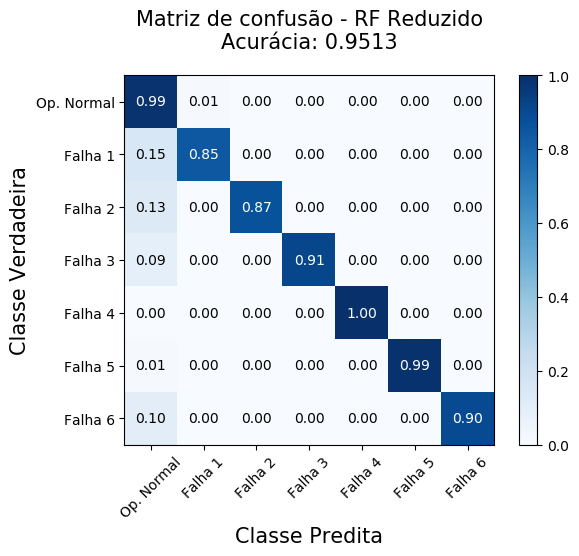

In [25]:
# Matriz de confusão e relatório de classificação
class_report = classification_report(test_output, predictions2)
print('Relatório de classificação:\n', class_report)
conf_mat = confusion_matrix(
    test_output, predictions2, labels=[0, 1, 2, 3, 4, 5, 6])
print('Matriz de confusão:\n', conf_mat)

# Gráfico matriz de confusão
plt.rcParams.update(plt.rcParamsDefault)
LABELS = ["Op. Normal", "Falha 1", "Falha 2",
          "Falha 3", "Falha 4", "Falha 5", "Falha 6"]
acc = accuracy_score(test_output, predictions2)
plot_confusion_matrix(conf_mat=conf_mat, colorbar=True, show_absolute=False,
show_normed=True, class_names=LABELS, cmap=plt.cm.Blues)

plt.title("Matriz de confusão - RF Reduzido\nAcurácia: %1.4f" % acc, fontsize=15)
plt.ylabel('Classe Verdadeira', fontsize=15)
plt.xlabel('Classe Predita', fontsize=15)
plt.savefig('RF_confmat_reduced.png')
plt.show()
plt.close()

Variável: ACG1P(t-1)           Importância: 0.1298
Variável: ACG1P(t)             Importância: 0.1282
Variável: SW5F(t)              Importância: 0.1014
Variável: SW5F(t-1)            Importância: 0.0926
Variável: C2SL(t)              Importância: 0.0915
Variável: SW8T(t)              Importância: 0.0835
Variável: C2SL(t-1)            Importância: 0.0804
Variável: SW1F(t-1)            Importância: 0.0792
Variável: SW1F(t)              Importância: 0.0738
Variável: SW8T(t-1)            Importância: 0.0727
Variável: AMG1P(t)             Importância: 0.0341
Variável: AMG1P(t-1)           Importância: 0.0329


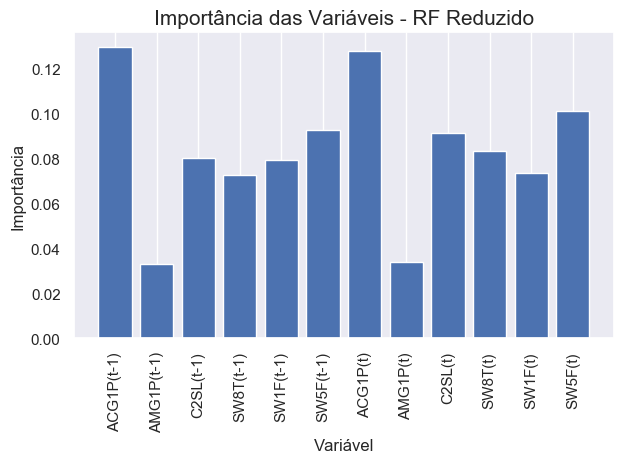

In [26]:
# Importancia das variáveis
importances2 = list(m3.feature_importances_)
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(header_red, importances2)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
[print('Variável: {:20} Importância: {}'.format(*pair)) for pair in feature_importances]

# Gráfico importância
sns.set(font_scale=1)
x_values = list(range(len(importances2)))
plt.figure()
plt.grid(axis='y')
plt.bar(x_values, importances2, orientation='vertical')
plt.xticks(x_values, header_red, rotation='vertical')
plt.ylabel('Importância')
plt.xlabel('Variável')
plt.title('Importância das Variáveis - RF Reduzido', fontsize=15)
plt.tight_layout()
plt.savefig('RF_importance_reduced.png')
plt.show()
plt.close()

In [ ]:
'''# Finaliza a contagem do tempo
elapsed = time.time() - t
print('Computing time:', elapsed)

# Fecha o arquivo
f.close()'''